In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
dataset_path = '../data/raw/default_of_credit_card_clients.xls'
data = pd.read_excel(dataset_path, header=1)


# Convert specific columns to categorical types
categorical_cols = [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'default payment next month'  # <-- use spaces, not dots
]
for col in categorical_cols:
    data[col] = data[col].astype('category')
data['ID'] = data['ID'].astype(str)

# Map categorical codes to labels
data['SEX'] = data['SEX'].map({1: 'male', 2: 'female'}).astype('category')
data['EDUCATION'] = data['EDUCATION'].map({
    1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others',
    5: 'unknown', 6: 'unknown', 0: 'unknown'
}).astype('category')
data['MARRIAGE'] = data['MARRIAGE'].map({1: 'married', 2: 'single', 3: 'others', 0: 'unknown'}).astype('category')


# Display the first few rows of the dataset
print("Head: ", data.head())
print("Types: ", data.dtypes)

Head:    ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
0  1      20000   2         2        1   24     2     2    -1    -1  ...   
1  2     120000   2         2        2   26    -1     2     0     0  ...   
2  3      90000   2         2        2   34     0     0     0     0  ...   
3  4      50000   2         2        1   37     0     0     0     0  ...   
4  5      50000   1         2        1   57    -1     0    -1     0  ...   

  BILL_AMT4 BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0         0         0          0         0       689         0         0   
1      3272      3455       3261         0      1000      1000      1000   
2     14331     14948      15549      1518      1500      1000      1000   
3     28314     28959      29547      2000      2019      1200      1100   
4     20940     19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0      

In [26]:
# Check for missing values and unique values
print("Describe: ", data.describe())
print("Missing values: ", data.isnull().sum())
print("Unique values: ", data.nunique())

Describe:                   ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904   

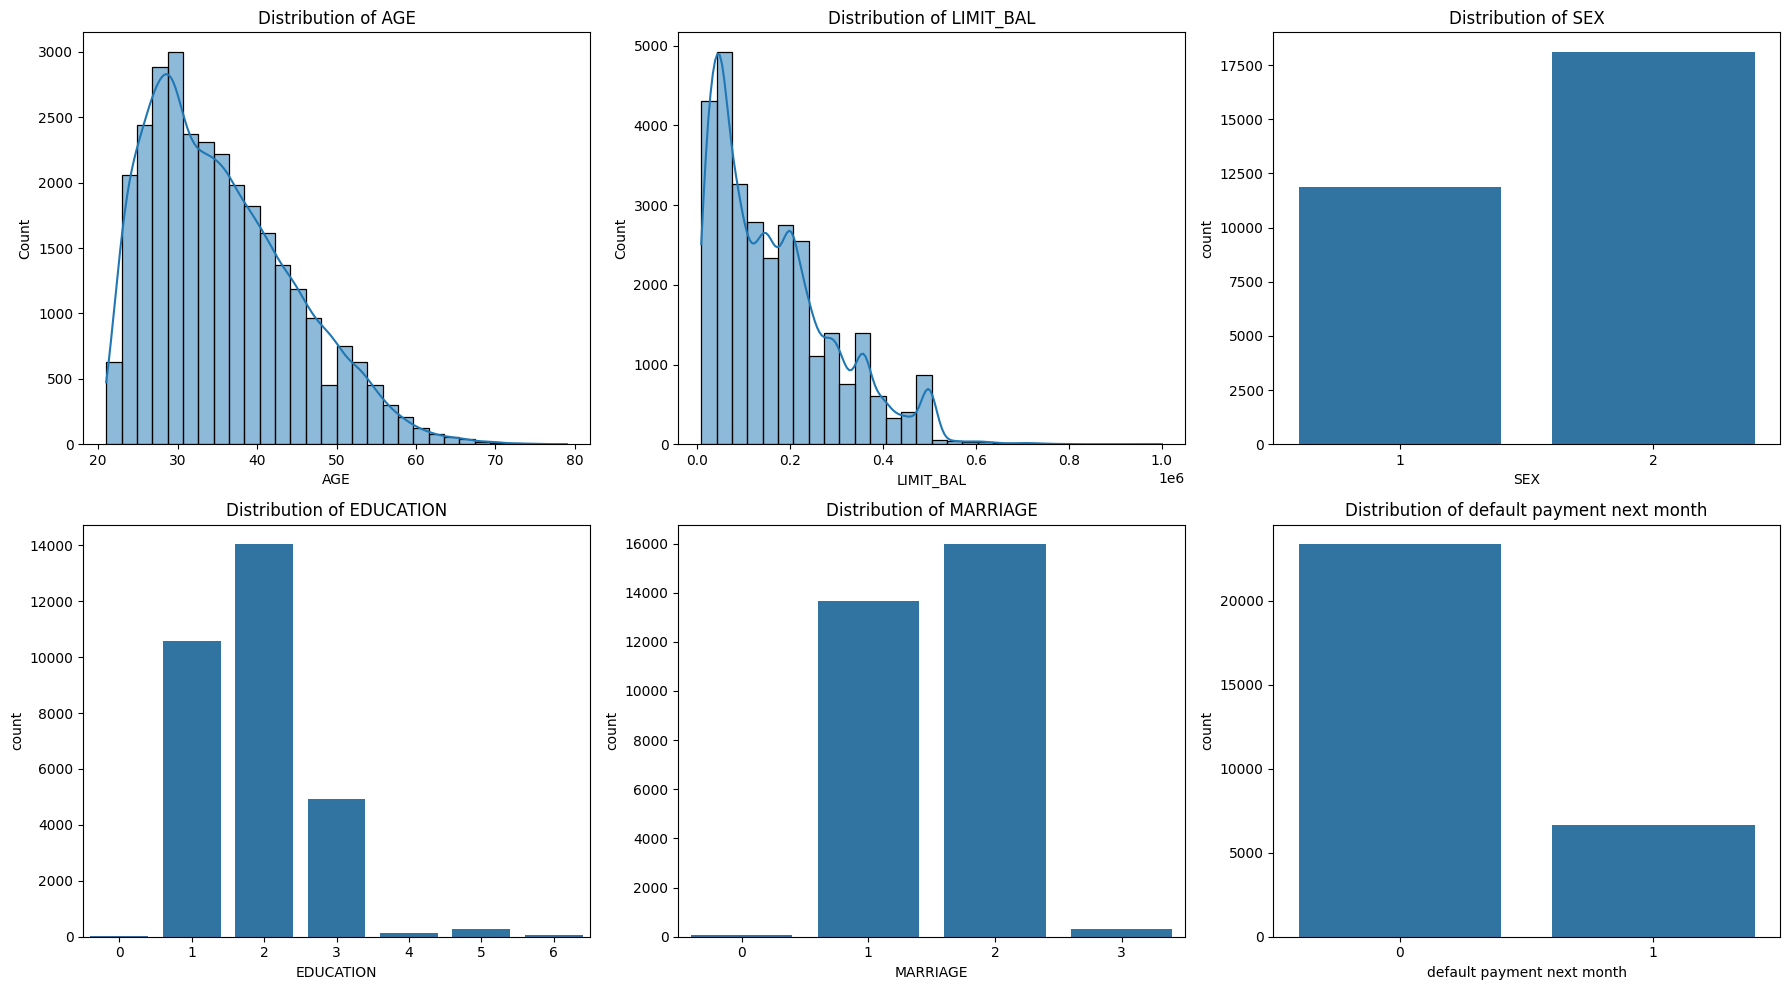

In [34]:

# List of features to plot
features = ['AGE', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    if str(data[feature].dtype) == 'category' or data[feature].nunique() < 10:
        sns.countplot(x=feature, data=data, ax=ax)
    else:
        sns.histplot(data[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()